# Vanshika CS - D

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv("brca.csv")   # apni file ka naam yaha likho

print(df.head())
print(df.columns)


In [8]:
X = df[['x.radius_mean', 'x.texture_mean']] # sirf 2 features
y = df['y']


In [9]:
y = y.map({'M':1, 'B':0})


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [14]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8947368421052632


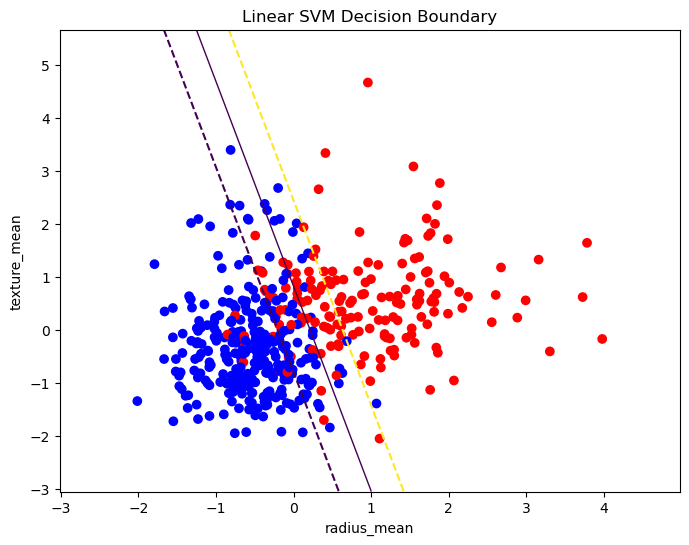

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Plot boundary ke liye grid banana
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))

# Decision boundary
plt.contour(xx, yy, Z, levels=[0], linewidths=1)

# Margin lines
plt.contour(xx, yy, Z, levels=[-1, 1], linestyles=['--', '--'])

# Data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')

plt.title("Linear SVM Decision Boundary")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.show()


In [17]:
model = SVC(kernel='poly', degree=3)
model.fit(X_train, y_train)


,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [18]:
accuracy = model.score(X_test, y_test)
print("Polynomial SVM Accuracy:", accuracy)


Polynomial SVM Accuracy: 0.8859649122807017


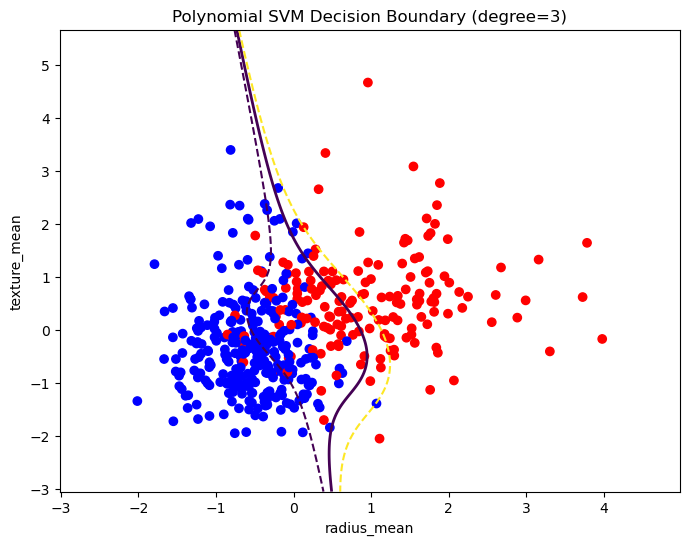

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Grid banana
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

# Prediction on grid
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))

# Decision boundary
plt.contour(xx, yy, Z, levels=[0], linewidths=2)

# Margin lines
plt.contour(xx, yy, Z, levels=[-1, 1], linestyles=['--', '--'])

# Data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')

plt.title("Polynomial SVM Decision Boundary (degree=3)")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.show()


In [21]:
y_pred = model.predict(X_test)


In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[70  1]
 [12 31]]


In [23]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92        71
           1       0.97      0.72      0.83        43

    accuracy                           0.89       114
   macro avg       0.91      0.85      0.87       114
weighted avg       0.90      0.89      0.88       114



In [24]:
print("Number of Support Vectors:", model.n_support_)


Number of Support Vectors: [87 86]


In [25]:
print(model.support_vectors_)


[[-0.06553815 -0.9353505 ]
 [-0.17616487  2.097224  ]
 [ 0.03374224  0.30979713]
 [-0.37188908  0.51460646]
 [ 0.0734544  -1.33333226]
 [ 0.17273479 -1.21463594]
 [-0.29246476 -0.14171435]
 [-0.26126235  0.31212451]
 [-0.23856969  0.21670198]
 [ 0.6294246  -0.8143268 ]
 [-0.45982314  0.16084489]
 [-0.17900146 -0.20920833]
 [-0.09674056 -0.2999761 ]
 [ 0.15855188 -0.54667825]
 [-0.50520846 -0.04163706]
 [ 0.1869177   1.44788533]
 [-0.34635983 -0.27902969]
 [-0.26693552  0.35867208]
 [ 0.03941541  2.01343836]
 [ 0.2039372  -0.35816057]
 [-0.34068667  2.26246789]
 [-0.29813793 -0.18127979]
 [ 0.11032997  1.34780804]
 [-0.43145731 -0.03000017]
 [-0.30664768  0.3679816 ]
 [-0.05135524  0.00956527]
 [ 0.05076174 -0.23946425]
 [ 0.22379328  0.23532101]
 [ 1.06909491 -1.38918935]
 [-0.34068667 -0.22782736]
 [-0.05986499  0.34936257]
 [-0.53924745  0.30746975]
 [ 0.24932252 -0.02301803]
 [ 0.14436897  0.81018356]
 [-0.52506454  0.08404139]
 [-0.45698656 -0.13938697]
 [-0.10808689 -0.36281533]
 

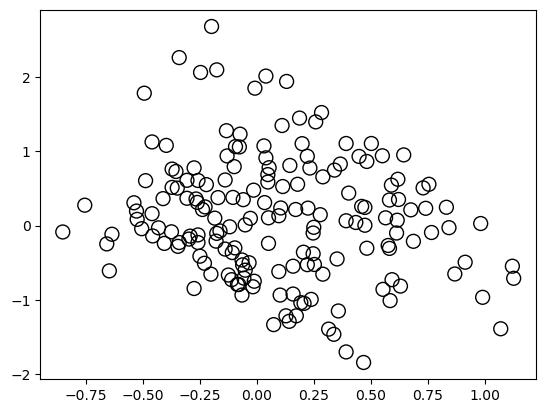

In [26]:
#graph main support vector show krne ke liye
plt.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=100,
    facecolors='none',
    edgecolors='k'
)


In [27]:
# 4 kernel comparison
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"{k} Kernel Accuracy:", acc)


linear Kernel Accuracy: 0.8947368421052632
poly Kernel Accuracy: 0.8859649122807017
rbf Kernel Accuracy: 0.868421052631579
sigmoid Kernel Accuracy: 0.8333333333333334


In [28]:
#polynomial defree comparek rni hain 
for d in [2, 3, 4]:
    model = SVC(kernel='poly', degree=d)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"Polynomial degree {d} Accuracy:", acc)


Polynomial degree 2 Accuracy: 0.7105263157894737
Polynomial degree 3 Accuracy: 0.8859649122807017
Polynomial degree 4 Accuracy: 0.7017543859649122
